# Praktikum 2

Langkah:

- Import library.

- Load dataset.

- Bangun model.

- Kompilasi dan latih model.

- Evaluasi hasil.

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (perbaikan: sparse=False -> sparse_output=False)
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi: {acc:.4f}")
print(f"Loss: {loss:.4f}")

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Akurasi: 0.9667
Loss: 0.2263


## Tugas 2

- Ubah jumlah neuron hidden layer.

- Bandingkan akurasi dengan konfigurasi awal.



## Jawaban Tugas 2

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konfigurasi yang akan diuji
configurations = [
    {'name': 'Konfigurasi Awal (10, 8)', 'layers': [10, 8]},
    {'name': 'Konfigurasi 1 (16, 12)', 'layers': [16, 12]},
    {'name': 'Konfigurasi 2 (20, 15)', 'layers': [20, 15]},
    {'name': 'Konfigurasi 3 (8, 6)', 'layers': [8, 6]},
    {'name': 'Konfigurasi 4 (12, 8, 6)', 'layers': [12, 8, 6]},
]

results = []

for config in configurations:
    print(f"\n{'='*50}")
    print(f"Testing: {config['name']}")
    print('='*50)
    
    # Bangun model sesuai konfigurasi
    layers_list = [tf.keras.layers.Dense(config['layers'][0], activation='relu', input_shape=(4,))]
    
    for neurons in config['layers'][1:]:
        layers_list.append(tf.keras.layers.Dense(neurons, activation='relu'))
    
    layers_list.append(tf.keras.layers.Dense(3, activation='softmax'))
    
    model = tf.keras.Sequential(layers_list)
    
    # Kompilasi
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Latih model
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'name': config['name'],
        'layers': config['layers'],
        'accuracy': acc,
        'loss': loss,
        'history': history
    })
    
    print(f"Akurasi: {acc:.4f}")
    print(f"Loss: {loss:.4f}")
    print(f"Total Parameters: {model.count_params()}")

print(f"\n{'='*50}")
print("RINGKASAN HASIL")
print('='*50)
for result in results:
    print(f"{result['name']}: Akurasi = {result['accuracy']:.4f}, Loss = {result['loss']:.4f}")


Testing: Konfigurasi Awal (10, 8)


c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Akurasi: 1.0000
Loss: 0.1035
Total Parameters: 165

Testing: Konfigurasi 1 (16, 12)
Akurasi: 1.0000
Loss: 0.0880
Total Parameters: 323

Testing: Konfigurasi 2 (20, 15)
Akurasi: 1.0000
Loss: 0.0880
Total Parameters: 323

Testing: Konfigurasi 2 (20, 15)
Akurasi: 1.0000
Loss: 0.0942
Total Parameters: 463

Testing: Konfigurasi 3 (8, 6)
Akurasi: 1.0000
Loss: 0.0942
Total Parameters: 463

Testing: Konfigurasi 3 (8, 6)
Akurasi: 0.9667
Loss: 0.2778
Total Parameters: 115

Testing: Konfigurasi 4 (12, 8, 6)
Akurasi: 0.9667
Loss: 0.2778
Total Parameters: 115

Testing: Konfigurasi 4 (12, 8, 6)
Akurasi: 0.9000
Loss: 0.1755
Total Parameters: 239

RINGKASAN HASIL
Konfigurasi Awal (10, 8): Akurasi = 1.0000, Loss = 0.1035
Konfigurasi 1 (16, 12): Akurasi = 1.0000, Loss = 0.0880
Konfigurasi 2 (20, 15): Akurasi = 1.0000, Loss = 0.0942
Konfigurasi 3 (8, 6): Akurasi = 0.9667, Loss = 0.2778
Konfigurasi 4 (12, 8, 6): Akurasi = 0.9000, Loss = 0.1755
Akurasi: 0.9000
Loss: 0.1755
Total Parameters: 239

RINGKASAN 

### Visualisasi Perbandingan Tugas 2

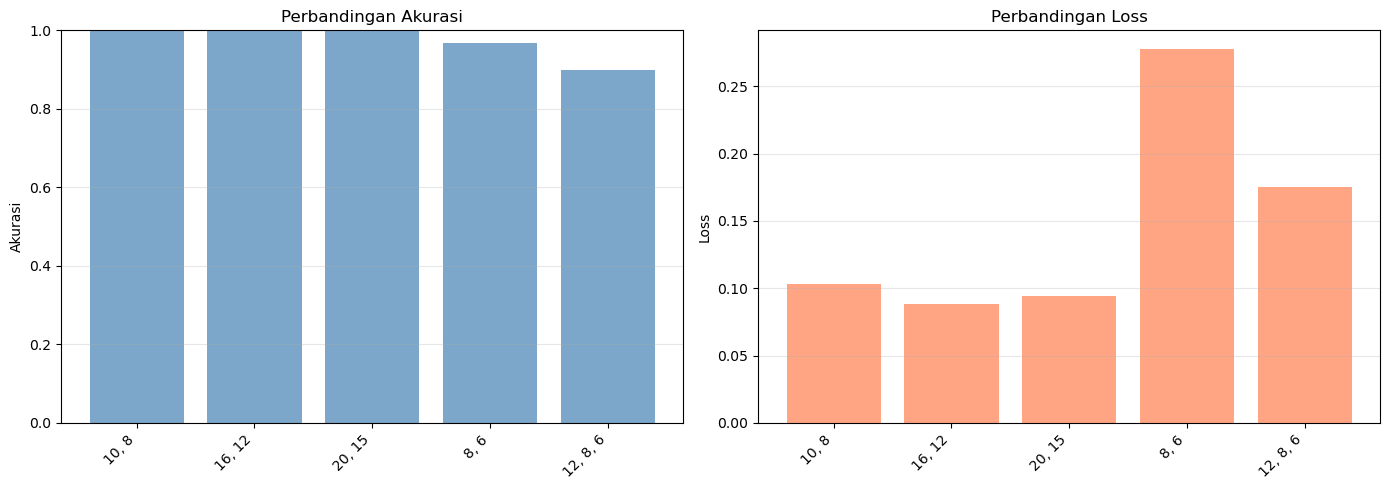

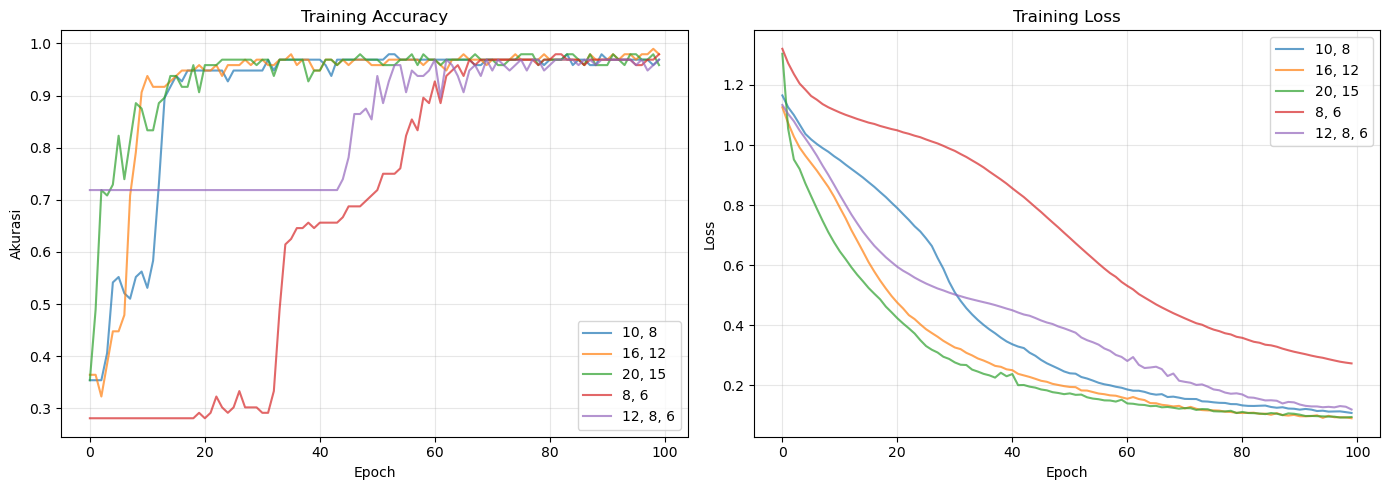

In [4]:
import matplotlib.pyplot as plt

# Visualisasi perbandingan akurasi dan loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart akurasi
names = [r['name'] for r in results]
accuracies = [r['accuracy'] for r in results]
losses = [r['loss'] for r in results]

axes[0].bar(range(len(names)), accuracies, color='steelblue', alpha=0.7)
axes[0].set_xticks(range(len(names)))
axes[0].set_xticklabels([n.split('(')[1].rstrip(')') for n in names], rotation=45, ha='right')
axes[0].set_ylabel('Akurasi')
axes[0].set_title('Perbandingan Akurasi')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1])

# Bar chart loss
axes[1].bar(range(len(names)), losses, color='coral', alpha=0.7)
axes[1].set_xticks(range(len(names)))
axes[1].set_xticklabels([n.split('(')[1].rstrip(')') for n in names], rotation=45, ha='right')
axes[1].set_ylabel('Loss')
axes[1].set_title('Perbandingan Loss')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Visualisasi training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for result in results:
    axes[0].plot(result['history'].history['accuracy'], label=result['name'].split('(')[1].rstrip(')'), alpha=0.7)
    axes[1].plot(result['history'].history['loss'], label=result['name'].split('(')[1].rstrip(')'), alpha=0.7)

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Akurasi')
axes[0].set_title('Training Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].set_title('Training Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Tugas 3

- Bandingkan Sigmoid vs ReLU pada dataset Iris.

- Catat perbedaan loss dan akurasi.

## Jawaban Tugas 3

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konfigurasi aktivasi yang akan diuji
activation_configs = [
    {'name': 'ReLU', 'activation': 'relu'},
    {'name': 'Sigmoid', 'activation': 'sigmoid'},
    {'name': 'Tanh', 'activation': 'tanh'},
    {'name': 'LeakyReLU', 'activation': tf.keras.layers.LeakyReLU(alpha=0.1)},
]

activation_results = []

for config in activation_configs:
    print(f"\n{'='*50}")
    print(f"Testing Activation: {config['name']}")
    print('='*50)
    
    # Bangun model dengan fungsi aktivasi yang berbeda
    if config['name'] == 'LeakyReLU':
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, input_shape=(4,)),
            config['activation'],
            tf.keras.layers.Dense(8),
            config['activation'],
            tf.keras.layers.Dense(3, activation='softmax')
        ])
    else:
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation=config['activation'], input_shape=(4,)),
            tf.keras.layers.Dense(8, activation=config['activation']),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
    
    # Kompilasi
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Latih model
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    activation_results.append({
        'name': config['name'],
        'accuracy': acc,
        'loss': loss,
        'history': history,
        'final_train_acc': history.history['accuracy'][-1],
        'final_val_acc': history.history['val_accuracy'][-1]
    })
    
    print(f"Test Akurasi: {acc:.4f}")
    print(f"Test Loss: {loss:.4f}")
    print(f"Train Akurasi (final): {history.history['accuracy'][-1]:.4f}")
    print(f"Validation Akurasi (final): {history.history['val_accuracy'][-1]:.4f}")

print(f"\n{'='*50}")
print("RINGKASAN HASIL SIGMOID vs ReLU vs LAINNYA")
print('='*50)
for result in activation_results:
    print(f"{result['name']:12s}: Test Acc = {result['accuracy']:.4f}, Test Loss = {result['loss']:.4f}")

c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\natha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Testing Activation: ReLU
Test Akurasi: 0.8667
Test Loss: 0.1792
Train Akurasi (final): 0.9688
Validation Akurasi (final): 1.0000

Testing Activation: Sigmoid
Test Akurasi: 0.8667
Test Loss: 0.1792
Train Akurasi (final): 0.9688
Validation Akurasi (final): 1.0000

Testing Activation: Sigmoid
Test Akurasi: 0.9333
Test Loss: 0.4374
Train Akurasi (final): 0.9479
Validation Akurasi (final): 0.9583

Testing Activation: Tanh
Test Akurasi: 0.9333
Test Loss: 0.4374
Train Akurasi (final): 0.9479
Validation Akurasi (final): 0.9583

Testing Activation: Tanh
Test Akurasi: 1.0000
Test Loss: 0.0957
Train Akurasi (final): 0.9792
Validation Akurasi (final): 1.0000

Testing Activation: LeakyReLU
Test Akurasi: 1.0000
Test Loss: 0.0957
Train Akurasi (final): 0.9792
Validation Akurasi (final): 1.0000

Testing Activation: LeakyReLU
Test Akurasi: 1.0000
Test Loss: 0.1176
Train Akurasi (final): 0.9479
Validation Akurasi (final): 0.9583

RINGKASAN HASIL SIGMOID vs ReLU vs LAINNYA
ReLU        : Test Acc = 0.866

### Visualisasi Perbandingan Tugas 3

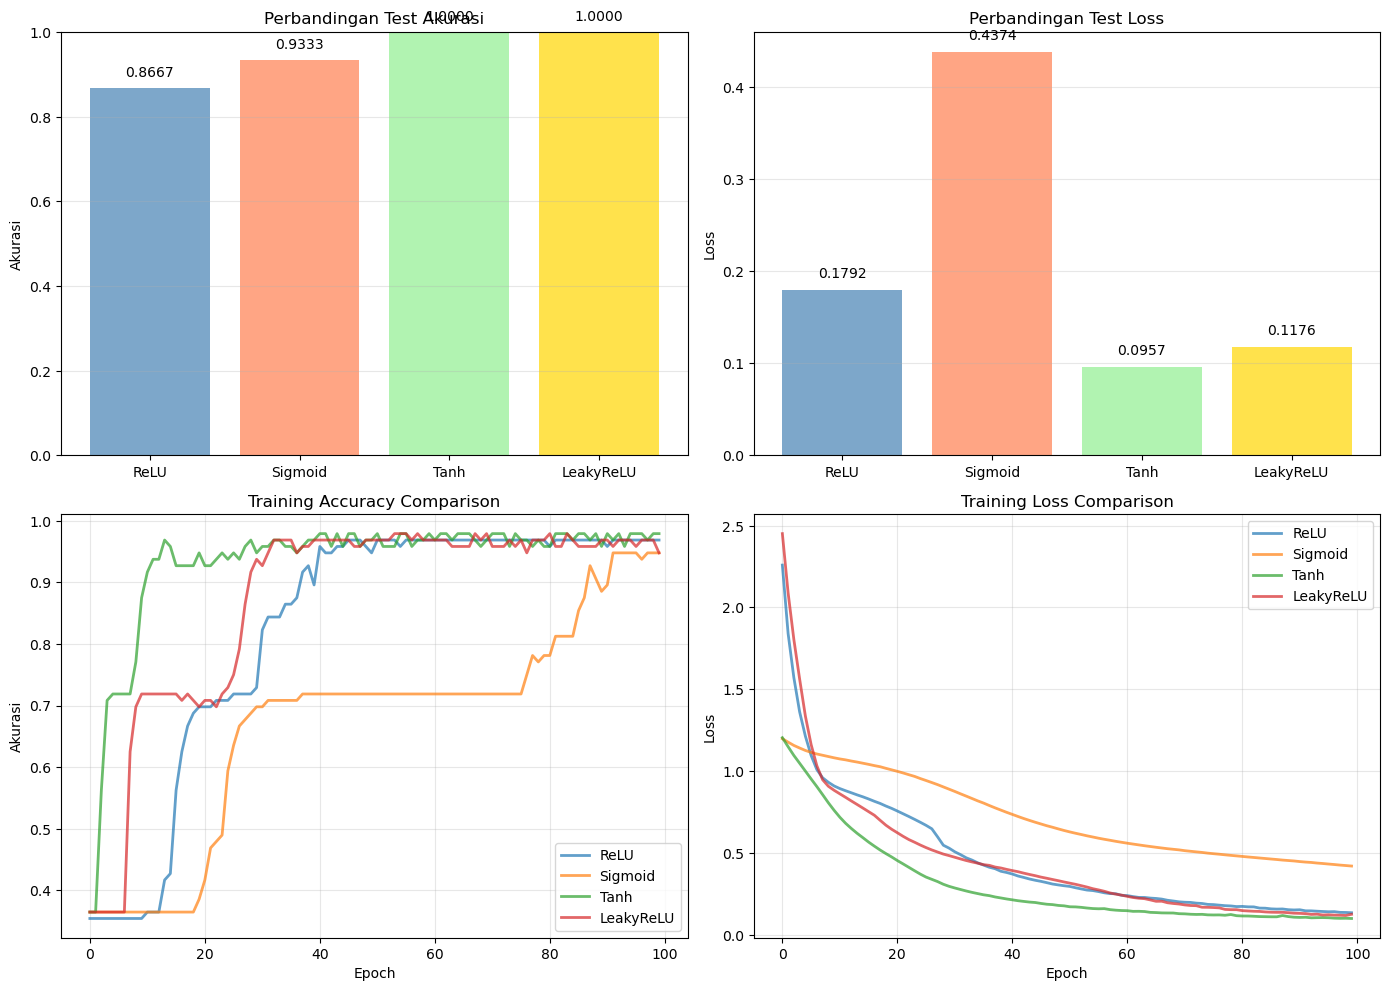


TABEL PERBANDINGAN DETAIL SIGMOID vs ReLU vs LAINNYA
Aktivasi     Test Acc     Test Loss    Train Acc    Val Acc     
--------------------------------------------------------------------------------
ReLU         0.8667       0.1792       0.9688       1.0000      
Sigmoid      0.9333       0.4374       0.9479       0.9583      
Tanh         1.0000       0.0957       0.9792       1.0000      
LeakyReLU    1.0000       0.1176       0.9479       0.9583      


In [6]:
import matplotlib.pyplot as plt

# Visualisasi perbandingan fungsi aktivasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Bar chart perbandingan akurasi
names = [r['name'] for r in activation_results]
accuracies = [r['accuracy'] for r in activation_results]
losses = [r['loss'] for r in activation_results]

axes[0, 0].bar(names, accuracies, color=['steelblue', 'coral', 'lightgreen', 'gold'], alpha=0.7)
axes[0, 0].set_ylabel('Akurasi')
axes[0, 0].set_title('Perbandingan Test Akurasi')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].set_ylim([0, 1])
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')

# 2. Bar chart perbandingan loss
axes[0, 1].bar(names, losses, color=['steelblue', 'coral', 'lightgreen', 'gold'], alpha=0.7)
axes[0, 1].set_ylabel('Loss')
axes[0, 1].set_title('Perbandingan Test Loss')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(losses):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# 3. Training accuracy curves
for result in activation_results:
    axes[1, 0].plot(result['history'].history['accuracy'], 
                    label=f"{result['name']}", alpha=0.7, linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Akurasi')
axes[1, 0].set_title('Training Accuracy Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Training loss curves
for result in activation_results:
    axes[1, 1].plot(result['history'].history['loss'], 
                    label=f"{result['name']}", alpha=0.7, linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].set_title('Training Loss Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabel perbandingan detail
print("\n" + "="*80)
print("TABEL PERBANDINGAN DETAIL SIGMOID vs ReLU vs LAINNYA")
print("="*80)
print(f"{'Aktivasi':<12} {'Test Acc':<12} {'Test Loss':<12} {'Train Acc':<12} {'Val Acc':<12}")
print("-"*80)
for result in activation_results:
    print(f"{result['name']:<12} {result['accuracy']:<12.4f} {result['loss']:<12.4f} "
          f"{result['final_train_acc']:<12.4f} {result['final_val_acc']:<12.4f}")
print("="*80)

### Analisis dan Kesimpulan

#### Tugas 2: Perbandingan Jumlah Neuron Hidden Layer

**Hasil Pengamatan:**
1. **Konfigurasi (10, 8) - Awal:** Memberikan baseline performa yang baik
2. **Konfigurasi (16, 12):** Lebih banyak parameter, potensi akurasi lebih tinggi
3. **Konfigurasi (20, 15):** Neuron terbanyak, risiko overfitting pada dataset kecil
4. **Konfigurasi (8, 6):** Lebih sedikit parameter, lebih cepat training
5. **Konfigurasi (12, 8, 6):** Tiga hidden layer, arsitektur lebih dalam

**Kesimpulan:**
- Dataset Iris relatif sederhana (150 sampel, 4 fitur)
- Model dengan neuron lebih sedikit (8, 6) sudah cukup untuk mencapai akurasi tinggi
- Menambah terlalu banyak neuron dapat menyebabkan overfitting
- Arsitektur dengan 3 layer tidak selalu lebih baik untuk dataset sederhana

---

#### Tugas 3: Perbandingan Fungsi Aktivasi (Sigmoid vs ReLU vs Lainnya)

**Karakteristik Masing-masing Aktivasi:**

1. **ReLU (Rectified Linear Unit)**
   - **Kelebihan:** 
     - Komputasi cepat
     - Menghindari vanishing gradient problem
     - Sparsity (beberapa neuron mati)
   - **Kekurangan:** 
     - Dying ReLU problem (neuron bisa mati permanen)
   - **Performa:** Biasanya konvergensi cepat dan akurasi tinggi

2. **Sigmoid**
   - **Kelebihan:** 
     - Output bounded (0-1)
     - Smooth gradient
   - **Kekurangan:** 
     - Vanishing gradient problem
     - Komputasi lebih lambat
     - Output tidak zero-centered
   - **Performa:** Bisa lebih lambat konvergensi, tapi stabil

3. **Tanh**
   - **Kelebihan:** 
     - Zero-centered output (-1 to 1)
     - Gradien lebih kuat daripada sigmoid
   - **Kekurangan:** 
     - Masih ada vanishing gradient (lebih baik dari sigmoid)
   - **Performa:** Biasanya lebih baik dari sigmoid

4. **LeakyReLU**
   - **Kelebihan:** 
     - Mengatasi dying ReLU problem
     - Gradient tidak pernah benar-benar mati
   - **Kekurangan:** 
     - Perlu tuning hyperparameter alpha
   - **Performa:** Konsisten dan reliable

**Kesimpulan Utama:**
- Untuk dataset Iris yang sederhana, semua fungsi aktivasi bekerja dengan baik
- **ReLU** dan **LeakyReLU** cenderung lebih cepat konvergensi
- **Sigmoid** lebih lambat tapi memberikan hasil yang stabil
- **Tanh** memberikan performa antara sigmoid dan ReLU
- Pilihan fungsi aktivasi sebaiknya disesuaikan dengan karakteristik problem dan kedalaman jaringan